<a href="https://colab.research.google.com/github/Harinijuluru/2303A52426-AIML/blob/main/lab_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 29ms/step - accuracy: 0.9090 - loss: 0.2842 - val_accuracy: 0.9825 - val_loss: 0.0553
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 27ms/step - accuracy: 0.9862 - loss: 0.0445 - val_accuracy: 0.9894 - val_loss: 0.0319
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 27ms/step - accuracy: 0.9906 - loss: 0.0297 - val_accuracy: 0.9896 - val_loss: 0.0297
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9945 - loss: 0.0179 - val_accuracy: 0.9885 - val_loss: 0.0356
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 27ms/step - accuracy: 0.9954 - loss: 0.0155 - val_accuracy: 0.9914 - val_loss: 0.0310
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9965 - loss: 0.0108 - val_accuracy: 0.9858 - val_loss: 0.0507
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 27ms/step - accuracy: 0.9971 - loss: 0.0078 - val_accuracy: 0.9899 - val_loss: 0.0368
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9980 -

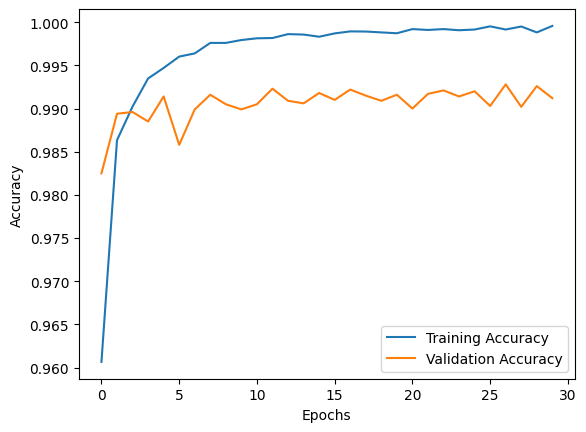

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)  # One-hot encoding

# Reshape data to fit CNN input requirements
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
